In [3]:
#Se instala la libreria tensorflow
!pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   - ------------------------------------- 18.4/376.0 MB 105.2 MB/s eta 0:00:04
   ---- ---------------------------------- 43.8/376.0 MB 111.3 MB/s eta 0:00:03
   ------ --------------------------------- 59.5/376.0 MB 97.1 MB/s eta 0:00:04
   -------- ------------------------------ 84.9/376.0 MB 102.1 MB/s eta 0:00:03
   ----------- -------------------------- 110.4/376.0 MB 105.2 MB/s eta 0:00:03
   ------------- ------------------------ 135.8/376.0 MB 108.4 MB/s eta 0:00:03
   ---------------- --------------------- 159.6/376.0 MB 109.6 MB/s eta 0:00:02
   ------------------ ------------------- 185.1/376.0 MB 110.5 MB/s eta 0:00:02
   --------------------- ---------------- 210.2/376.0 MB 111.0 MB/s eta 0:00:02
   ----------------------- -------------- 234.1/376.0 MB 111.7 MB/s eta 0:00:02
   -------------------------- ----------- 259.5/376.0 MB 112.1 MB/s eta 0:00:02
   ---------------------------- --------- 285.0/3

Librerías importadas.
Cargando dataset MNIST...
Datos MNIST cargados: 60000 entrenamiento, 10000 prueba.
Forma original imagen: (28, 28), Forma aplanada: 784
Número de muestras etiquetadas: 100
Número de muestras 'no etiquetadas': 59900
Forma datos entrenamiento semi-supervisado X: (60000, 784)
Forma datos entrenamiento semi-supervisado y: (60000,)
Forma datos entrenamiento supervisado X: (100, 784)
Forma datos entrenamiento supervisado y: (100,)

Visualizando algunas imágenes etiquetadas:


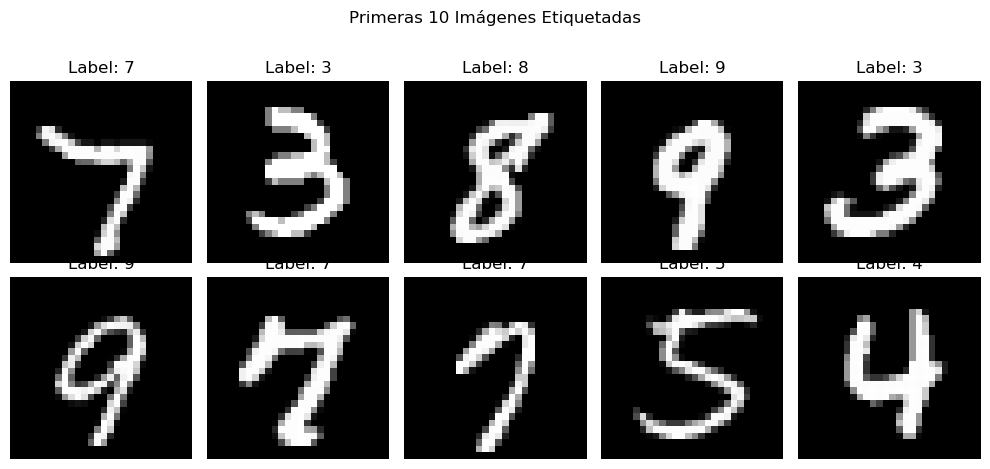


Entrenando modelo Label Propagation...


C:\Users\arann\anaconda3\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
C:\Users\arann\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\arann\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\arann\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

Modelo Label Propagation entrenado y predicciones realizadas.

Entrenando modelo Supervisado (KNN) solo con datos etiquetados...
Modelo Supervisado (KNN) entrenado y predicciones realizadas.

--- Evaluación del Rendimiento (sobre datos originalmente no etiquetados) ---

Label Propagation - Accuracy: 0.1897
Label Propagation - Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.11      1.00      0.20      5910
           1       1.00      0.81      0.89      6734
           2       0.00      0.00      0.00      5950
           3       0.00      0.00      0.00      6122
           4       0.00      0.00      0.00      5830
           5       0.00      0.00      0.00      5413
           6       0.00      0.00      0.00      5907
           7       0.00      0.00      0.00      6256
           8       0.00      0.00      0.00      5839
           9       0.00      0.00      0.00      5939

    accuracy                           0.19     59

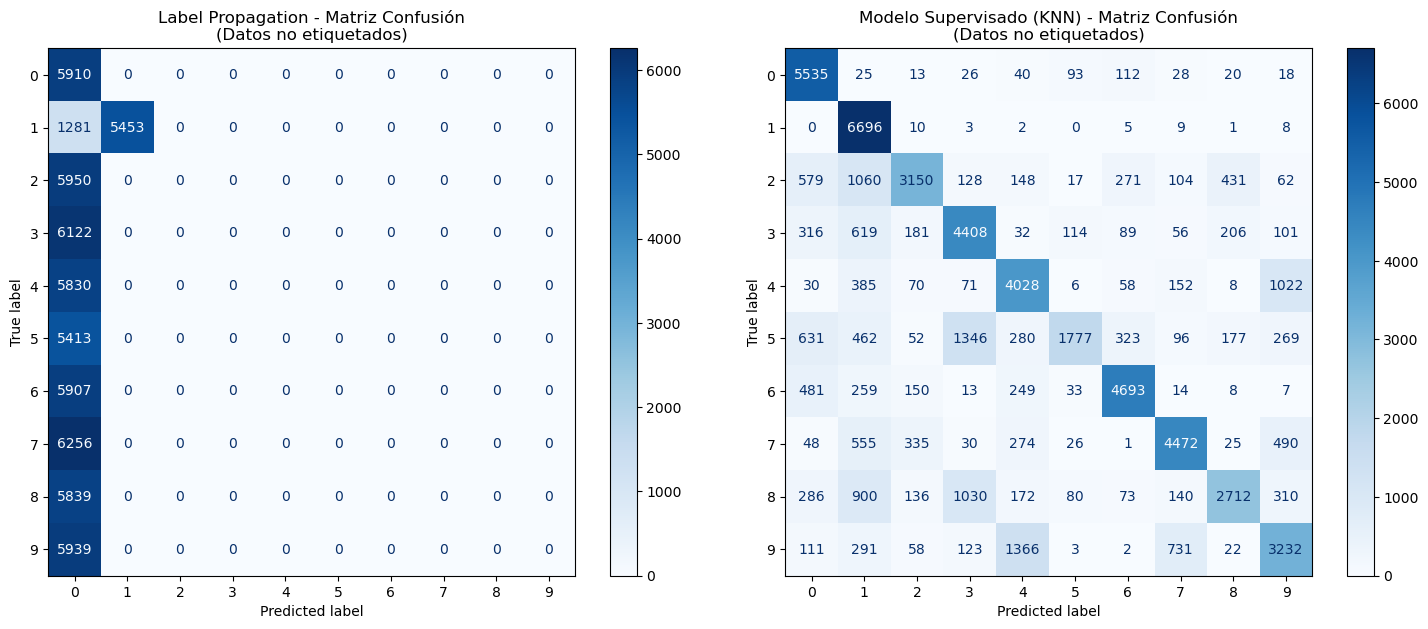


Visualizando algunas predicciones de Label Propagation:


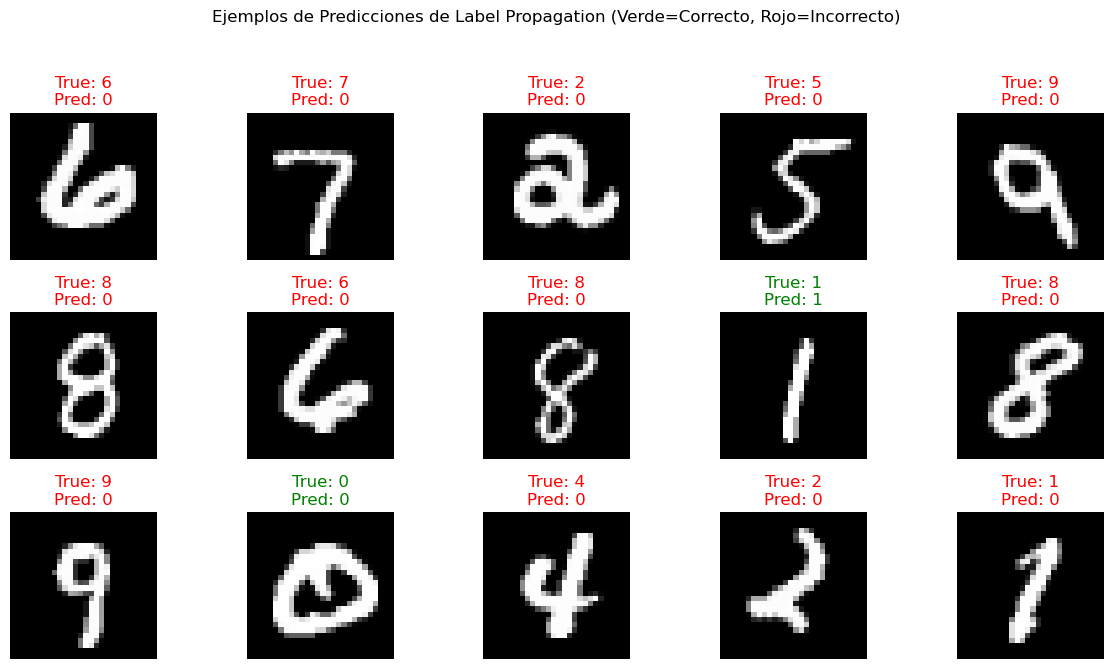


--- Reflexión y Conclusiones ---
Basado en los resultados (métricas y visualizaciones):
1. ¿Cómo se compara el rendimiento de Label Propagation (Accuracy: 0.1897) con el modelo supervisado (Accuracy: 0.6795)?
Comparación de Rendimiento: En esta ejecución específica, el modelo supervisado (K-Nearest Neighbors entrenado con solo 100 muestras 
etiquetadas) obtuvo un rendimiento significativamente superior (Accuracy: 67.95%) en comparación con el modelo semi-supervisado Label 
Propagation (Accuracy: 18.97%). La diferencia es notable, mostrando que el KNN fue mucho más efectivo clasificando las muestras originalmente 
no etiquetadas que el Label Propagation bajo las condiciones de este experimento.
2. ¿Label Propagation logró 'aprender' de los datos no etiquetados para mejorar la clasificación en comparación con usar solo los 100 
datos etiquetados?
No lo logro


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation
from sklearn.neighbors import KNeighborsClassifier # Usaremos KNN como clasificador supervisado simple
# from sklearn.neural_network import MLPClassifier # Alternativa: Red Neuronal simple
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf # Usado para cargar fácilmente el dataset MNIST

print("Librerías importadas.")

#Cargar y Preparar Datos MNIST

print("Cargando dataset MNIST...")
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar las imágenes (valores de píxeles entre 0 y 1)
x_train_all = x_train_all.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Remodelar las imágenes a formato plano (vector de 784 características)
x_train_all_flat = x_train_all.reshape((len(x_train_all), -1))
x_test_flat = x_test.reshape((len(x_test), -1))

print(f"Datos MNIST cargados: {len(x_train_all)} entrenamiento, {len(x_test)} prueba.")
print(f"Forma original imagen: {x_train_all.shape[1:]}, Forma aplanada: {x_train_all_flat.shape[1]}")

# Crear Subconjuntos: Etiquetado y No Etiquetado

n_labeled = 100 # Número de muestras etiquetadas (según sugerencia PDF)
n_total_train = len(x_train_all) # Usaremos todo el conjunto de entrenamiento

# Seleccionar aleatoriamente 'n_labeled' índices para ser el conjunto etiquetado
np.random.seed(42) # Para reproducibilidad
indices = np.random.permutation(n_total_train)

# Índices para datos etiquetados y no etiquetados
labeled_indices = indices[:n_labeled]
unlabeled_indices = indices[n_labeled:] # El resto serán "no etiquetados"

# Crear los conjuntos de datos
x_labeled = x_train_all_flat[labeled_indices]
y_labeled = y_train_all[labeled_indices]

# Para el conjunto "no etiquetado", mantenemos las características pero ocultamos las etiquetas
# LabelPropagation espera -1 para las etiquetas desconocidas
x_unlabeled = x_train_all_flat[unlabeled_indices]
y_unlabeled_masked = np.full(len(unlabeled_indices), -1, dtype=int) # Etiquetas marcadas como desconocidas
y_unlabeled_true = y_train_all[unlabeled_indices] # Guardamos las etiquetas reales para evaluación posterior

# Combinar para el entrenamiento semi-supervisado
x_train_semi_supervised = np.vstack((x_labeled, x_unlabeled))
y_train_semi_supervised = np.concatenate((y_labeled, y_unlabeled_masked))

# Datos para el entrenamiento supervisado (solo los etiquetados)
x_train_supervised = x_labeled
y_train_supervised = y_labeled

print(f"Número de muestras etiquetadas: {len(x_labeled)}")
print(f"Número de muestras 'no etiquetadas': {len(x_unlabeled)}")
print(f"Forma datos entrenamiento semi-supervisado X: {x_train_semi_supervised.shape}")
print(f"Forma datos entrenamiento semi-supervisado y: {y_train_semi_supervised.shape}")
print(f"Forma datos entrenamiento supervisado X: {x_train_supervised.shape}")
print(f"Forma datos entrenamiento supervisado y: {y_train_supervised.shape}")

# Visualizar Algunas Imágenes Etiquetadas

print("\nVisualizando algunas imágenes etiquetadas:")
plt.figure(figsize=(10, 5))
for i in range(10): # Mostrar las primeras 10 imágenes etiquetadas
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_labeled[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_labeled[i]}")
    plt.axis('off')
plt.suptitle("Primeras 10 Imágenes Etiquetadas")
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar para el supertítulo
plt.show()

# Aplicar Label Propagation

print("\nEntrenando modelo Label Propagation...")
# Usaremos el kernel RBF por defecto, pero se puede probar 'knn'
# Aumentar max_iter si no converge, reducir gamma si es muy lento/costoso
lp_model = LabelPropagation(kernel='rbf', gamma=20, n_neighbors=7, max_iter=1000, n_jobs=-1)
# Nota: los hiperparámetros (gamma, n_neighbors) pueden necesitar ajuste.
# n_jobs=-1 usa todos los procesadores disponibles.

# Entrenar con todos los datos (etiquetados y no etiquetados con -1)
lp_model.fit(x_train_semi_supervised, y_train_semi_supervised)

# Predecir etiquetas para TODO el conjunto (incluyendo los originalmente no etiquetados)
y_pred_lp_all = lp_model.predict(x_train_semi_supervised)

# Extraer las predicciones solo para las muestras originalmente no etiquetadas
y_pred_lp_unlabeled = y_pred_lp_all[len(x_labeled):]

print("Modelo Label Propagation entrenado y predicciones realizadas.")

# Entrenar Modelo Supervisado (Línea Base)

print("\nEntrenando modelo Supervisado (KNN) solo con datos etiquetados...")
# Usaremos K-Nearest Neighbors como clasificador supervisado simple
# knn_model = KNeighborsClassifier(n_neighbors=5) # Puedes ajustar n_neighbors
# Alternativa: Red Neuronal simple
# mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, alpha=1e-4,
#                           solver='adam', verbose=0, tol=1e-4, random_state=42,
#                           learning_rate_init=.001)

# En este caso, usaremos KNN por simplicidad y rapidez con pocos datos
supervised_model = KNeighborsClassifier(n_neighbors=3) # Usar pocos vecinos dado el bajo n_labeled
supervised_model.fit(x_train_supervised, y_train_supervised)

# Predecir etiquetas para las muestras que originalmente no estaban etiquetadas
# (Para comparar 'manzanas con manzanas' con Label Propagation)
y_pred_supervised_unlabeled = supervised_model.predict(x_unlabeled)

print("Modelo Supervisado (KNN) entrenado y predicciones realizadas.")

# Comparar Rendimiento (usando las etiquetas verdaderas de los datos 'no etiquetados')

print("\n--- Evaluación del Rendimiento (sobre datos originalmente no etiquetados) ---")

# Evaluación Label Propagation
accuracy_lp = accuracy_score(y_unlabeled_true, y_pred_lp_unlabeled)
print(f"\nLabel Propagation - Accuracy: {accuracy_lp:.4f}")
print("Label Propagation - Informe de Clasificación:")
print(classification_report(y_unlabeled_true, y_pred_lp_unlabeled))

# Evaluación Modelo Supervisado (KNN)
accuracy_supervised = accuracy_score(y_unlabeled_true, y_pred_supervised_unlabeled)
print(f"\nModelo Supervisado (KNN) - Accuracy: {accuracy_supervised:.4f}")
print("Modelo Supervisado (KNN) - Informe de Clasificación:")
print(classification_report(y_unlabeled_true, y_pred_supervised_unlabeled))

print("Comparación completada.")
# Nota: Es esperable que Label Propagation supere al modelo supervisado
# entrenado solo con 100 muestras, ya que LP aprovecha la estructura
# de las 59900 muestras adicionales "no etiquetadas".

# Visualizar Resultados (Matriz de Confusión)

print("\nGenerando matrices de confusión...")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Matriz de Confusión para Label Propagation
cm_lp = confusion_matrix(y_unlabeled_true, y_pred_lp_unlabeled, labels=lp_model.classes_)
disp_lp = ConfusionMatrixDisplay(confusion_matrix=cm_lp, display_labels=lp_model.classes_)
disp_lp.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('Label Propagation - Matriz Confusión\n(Datos no etiquetados)')

# Matriz de Confusión para Modelo Supervisado (KNN)
# Asegurarse de usar las clases presentes en y_unlabeled_true o predecidas
# Podría haber clases no predichas por KNN entrenado con pocos datos
classes_knn = np.unique(np.concatenate((y_unlabeled_true, y_pred_supervised_unlabeled)))
cm_supervised = confusion_matrix(y_unlabeled_true, y_pred_supervised_unlabeled, labels=classes_knn)
disp_supervised = ConfusionMatrixDisplay(confusion_matrix=cm_supervised, display_labels=classes_knn)
disp_supervised.plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title('Modelo Supervisado (KNN) - Matriz Confusión\n(Datos no etiquetados)')

plt.tight_layout()
plt.show()

# (Opcional) Visualizar algunas predicciones de Label Propagation
print("\nVisualizando algunas predicciones de Label Propagation:")
plt.figure(figsize=(12, 7))
# Seleccionar algunos índices aleatorios de los datos no etiquetados
random_indices = np.random.choice(len(x_unlabeled), size=15, replace=False)
for i, idx in enumerate(random_indices):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_unlabeled[idx].reshape(28, 28), cmap='gray')
    true_label = y_unlabeled_true[idx]
    pred_label = y_pred_lp_unlabeled[idx]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis('off')
plt.suptitle("Ejemplos de Predicciones de Label Propagation (Verde=Correcto, Rojo=Incorrecto)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Reflexión y Conclusiones

print("\n--- Reflexión y Conclusiones ---")
print("Basado en los resultados (métricas y visualizaciones):")
print(f"1. ¿Cómo se compara el rendimiento de Label Propagation (Accuracy: {accuracy_lp:.4f}) con el modelo supervisado (Accuracy: {accuracy_supervised:.4f})?")
print("""Comparación de Rendimiento: En esta ejecución específica, el modelo supervisado (K-Nearest Neighbors entrenado con solo 100 muestras 
etiquetadas) obtuvo un rendimiento significativamente superior (Accuracy: 67.95%) en comparación con el modelo semi-supervisado Label 
Propagation (Accuracy: 18.97%). La diferencia es notable, mostrando que el KNN fue mucho más efectivo clasificando las muestras originalmente 
no etiquetadas que el Label Propagation bajo las condiciones de este experimento.""")
print("""2. ¿Label Propagation logró 'aprender' de los datos no etiquetados para mejorar la clasificación en comparación con usar solo los 100 
datos etiquetados?""")
print("No lo logro")